# MPC Tensor
### With Duet

In this tutorial we will show you how to perform secure multiparty computation with data you cannot see. There are three /notebooks:
* [POC-MPCTensor-Duet-Alice](POC-MPCTensor-Duet-Alice.ipynb). Alice will store data in his Duet server and will be available for the data-scientist.
* [POC-MPCTensor-Duet-Bob](POC-MPCTensor-Duet-Bob.ipynb).  Bob will store data in his Duet server and will be available for the data-scientist.
* [POC-MPCTensor-Duet-DS](POC-MPCTensor-Duet-DS.ipynb) (this notebook). The data-scientist will be the responsible of perform any secure computation.

## 0 - Libraries

Import main libraries

In [1]:
import syft as sy

## 1 - Connect to the Data owners

### 1.1 - Connect to Alice

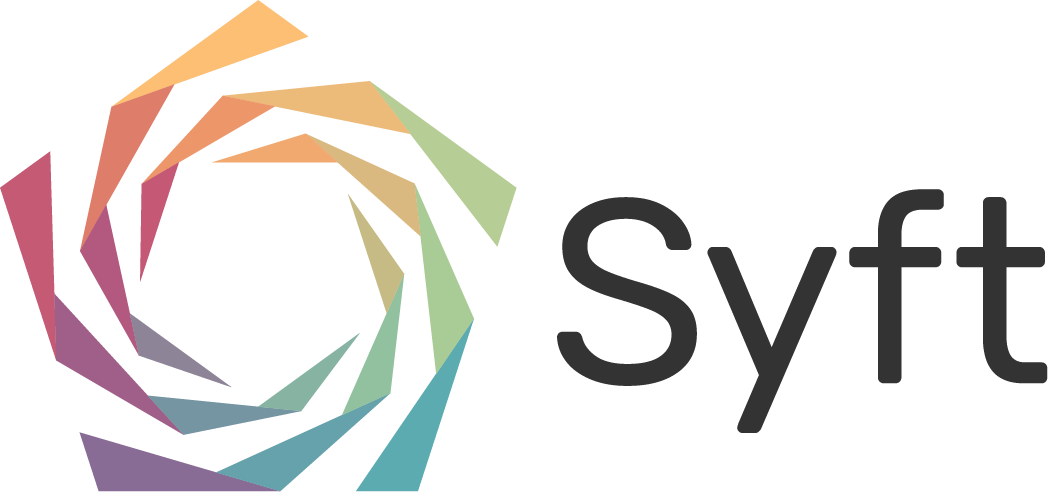

🎤  🎸  ♪♪♪ Joining Duet ♫♫♫  🎻  🎹

♫♫♫ > DISCLAIMER: Duet is an experimental feature currently in beta.
♫♫♫ >             Use at your own risk.
♫♫♫ >

    > ❤️ Love Duet? Please consider supporting our community!
    > https://github.com/sponsors/OpenMined

♫♫♫ > Punching through firewall to OpenGrid Network Node at:
♫♫♫ > http://ec2-18-216-8-163.us-east-2.compute.amazonaws.com:5000
♫♫♫ >
♫♫♫ > ...waiting for response from OpenGrid Network... DONE!
♫♫♫ > STEP 1: Send the following Duet Client ID to your duet partner!
♫♫♫ > Duet Client ID: dd09c34d379f5b047b8f14e7bcdf1bc6

♫♫♫ > ...waiting for partner to connect...

♫♫♫ > CONNECTED!


In [2]:
duet_alice = sy.join_duet("f6c13409f9336891b26d6be3c23a09c5")

## 1.2 - Connect to Bob

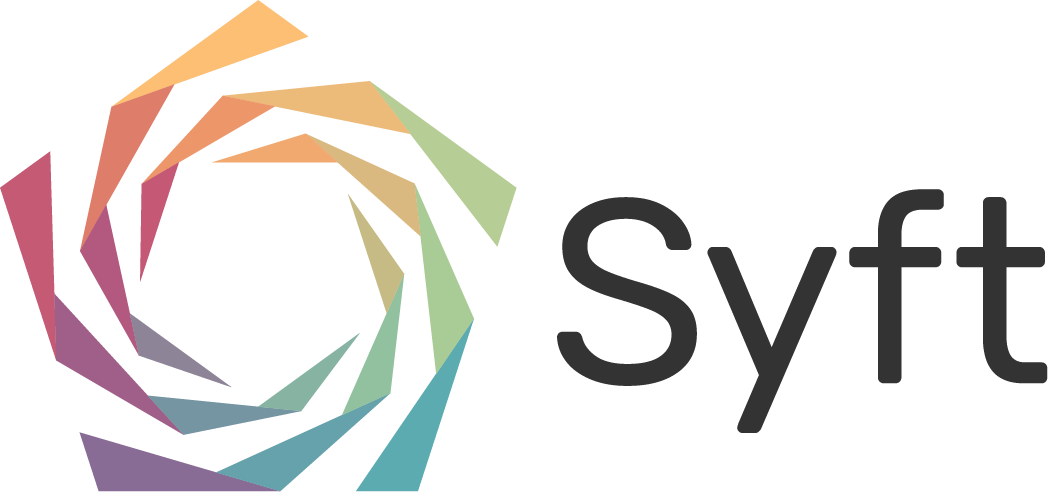

🎤  🎸  ♪♪♪ Joining Duet ♫♫♫  🎻  🎹

♫♫♫ > DISCLAIMER: Duet is an experimental feature currently in beta.
♫♫♫ >             Use at your own risk.
♫♫♫ >

    > ❤️ Love Duet? Please consider supporting our community!
    > https://github.com/sponsors/OpenMined

♫♫♫ > Punching through firewall to OpenGrid Network Node at:
♫♫♫ > http://ec2-18-216-8-163.us-east-2.compute.amazonaws.com:5000
♫♫♫ >
♫♫♫ > ...waiting for response from OpenGrid Network... DONE!
♫♫♫ > STEP 1: Send the following Duet Client ID to your duet partner!
♫♫♫ > Duet Client ID: 74e7436efb9d200d447001573dbbdfc0

♫♫♫ > ...waiting for partner to connect...

♫♫♫ > CONNECTED!


In [3]:
duet_bob = sy.join_duet("637630d01b9e2217e1bd007933c7d3ed")

## 2 - Secure MultiParty Computation

### 2.1 - Create a session

The session is used to send some config information only once between the parties.
This information can be:
* the ring size in which we do the computation
* the precision and base
* the approximation methods we are using for different functions (TODO)

In [4]:
from sympc.session import Session
from sympc.tensor import MPCTensor

In [5]:
session = Session(parties=[duet_alice, duet_bob])
print(session)

### 2.2 - Send the session to all the parties

In [6]:
Session.setup_mpc(session)

## 2.3 -  Private Operations

Now we are ready to perform private operations. First of all let's check which datasets are stored in the Data Owner Duet server

In [7]:
duet_alice.store.pandas

ID              Tags  \
0  <UID: cc125e11ae6a4519b06dca68f2bb3621>  [#test_tensor_1]   
1  <UID: beed866f0a524b83a409dde1bb1534d6>  [#test_tensor_2]   

                                  Description  
0     Dummy tensor to test the sum of tensors  
1  Dummy tensor to test the matmul of tensors

In [8]:
duet_bob.store.pandas

ID              Tags  \
0  <UID: ab7c32aa50ec4c93a6fa8a7838d36ac0>  [#test_tensor_1]   
1  <UID: bde17c3bc32b43e3a667b69e1c622176>  [#test_tensor_2]   

                                  Description  
0     Dummy tensor to test the sum of tensors  
1  Dummy tensor to test the matmul of tensors

### 2.3.1 - Sum, Substract and Multiply operations

Let's first do some basic operations. Notice that the difference here is that these operations are performed via SMPC, so the raw data is not leaving the data owner server!

In [9]:
x_secret = duet_alice.store[0]  # secret data to test sum, substract and multiply
y_secret = duet_bob.store[0]

In [10]:
x = MPCTensor(secret=x_secret, shape=(1,), session=session)  # MPC Tensor from x_secret
y = MPCTensor(secret=y_secret, shape=(1,), session=session)  # MPC Tensor from y_secret

In [11]:
print("[Priv + Priv] X - Y =", (x + y).reconstruct())
print("[Priv - Priv] X - Y =", (x - y).reconstruct())
print("[Priv * Priv] X * Y =", (x * y).reconstruct())

[Priv + Priv] X - Y = tensor([100.])
[Priv - Priv] X - Y = tensor([0.])
[Priv * Priv] X * Y = tensor([2500.])


### 2.3.2 - Matrix multiplication

Bit more complex operations such as matrix multiplications are valid as well. 
Remember that linear algebra is the basis of Deep Learning!

In [12]:
x_secret = duet_alice.store[1]  # secret data to test matmul
y_secret = duet_bob.store[1]

In [13]:
x = MPCTensor(secret=x_secret, shape=(2,2), session=session)  # MPC Tensor from x_secret
y = MPCTensor(secret=y_secret, shape=(2,2), session=session)  # MPC Tensor from y_secret

In [14]:
print("X @ X =\n", (x @ x).reconstruct())

X @ X =
 tensor([[ 7., 10.],
        [15., 22.]])


## Congratulations!!! - Time to Join the Community!

Congratulations on completing this notebook tutorial! If you enjoyed this and would like to join the movement toward privacy preserving, decentralized ownership of AI and the AI supply chain (data), you can do so in the following ways!

### Star PySyft and SyMPC on GitHub
The easiest way to help our community is just by starring the GitHub repos! This helps raise awareness of the cool tools we're building.

* [Star PySyft](https://github.com/OpenMined/PySyft)
* [Star SyMPC](https://github.com/OpenMined/SyMPC/)

### Join our Slack!
The best way to keep up to date on the latest advancements is to join our community! You can do so by filling out the form at http://slack.openmined.org

### Join a Code Project!
The best way to contribute to our community is to become a code contributor! At any time you can go to PySyft GitHub Issues page and filter for "Projects". This will show you all the top level Tickets giving an overview of what projects you can join! If you don't want to join a project, but you would like to do a bit of coding, you can also look for more "one off" mini-projects by searching for GitHub issues marked "good first issue".

* [PySyft Good First Issue Tickets](https://github.com/OpenMined/PySyft/labels/Good%20first%20issue%20%3Amortar_board%3A)
* [SyMPC Good First Issue Tickets](https://github.com/OpenMined/SyMPC/labels/good%20first%20issue)

### Donate
If you don't have time to contribute to our codebase, but would still like to lend support, you can also become a Backer on our Open Collective. All donations go toward our web hosting and other community expenses such as hackathons and meetups!

* [OpenMined's Open Collective Page](https://opencollective.com/openmined)